# Homework - Classification

In this homework, you will explore four simple classification method - logistic, kNN, LDA, QDA through simulated data (part 1) and actual data (part 2).

In [1]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part 1: Simulation Data
To illustrate the performances of these four classification approaches, we generated data from six different scenarios. For each scenario, we produced 100 random training data sets of two predictors $X_1$, $X_2$ and response $Y$ with two classes. On each of these sets, we use following code two split into training and test sets:
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
After that we fit each method to the data and computed the resulting test error rate on a test set. There are three method we will use: Logistics, kNN with k=1, kNN with *cross-validation*, LDA, QDA. With each scenario, try to run simulation several time, say 50 and plot the box plot of test error (1-accuracy).

### Scenario 1: 

The observations within each class were uncorrelated random normal variables with a different mean in each class, 0 and 1 respectively. The sample code for generate the data:

In [2]:
def accuracy(model,x,y):
    y_pred=model.predict(x)
    score=metrics.accuracy_score(y_true=y,y_pred=y_pred)
    return score

In [3]:
#your code is here
err=np.zeros((50,5))
for i in range(50):
    #Generate Data:
    data=np.zeros((100,3))
    #X1
    data[:50,2]=0
    mean1=[0,0]
    cov1=[[1, 0], [0, 1]]
    data[:50,0],data[:50,1]=np.random.multivariate_normal(mean1, cov1, 50).T
    #X2
    mean2=[1,1]
    cov2=[[1, 0], [0, 1]]
    data[50:,2]=1
    data[50:,0],data[50:,1]=np.random.multivariate_normal(mean2, cov2, 50).T
    #X, y
    X=data[:,0:2]
    y=data[:,2]
    X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=1, test_size=0.8)
    #QDA
    model=QuadraticDiscriminantAnalysis()
    model.fit(X_train, y_train)
    err[i,0]=1-accuracy(model,X_test,y_test)
    #LDA
    model=LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)
    err[i,1]=1-accuracy(model,X_test,y_test)
    #Logistics
    model=LogisticRegression()
    model.fit(X_train, y_train)
    err[i,2]=1-accuracy(model,X_test,y_test)
    #k-NN k=1
    model=KNeighborsClassifier(n_neighbors = 1)
    model.fit(X_train, y_train)
    err[i,3]=1-accuracy(model,X_test,y_test)
    #k-NN with CV
    folds=10
    num=len(X_train)
    err_k=np.zeros((8))
    kf_10 = KFold(n_splits=folds)
    for train_index, test_index in kf_10.split(X_train):
        X_train_k, X_test_k = X_train[train_index], X_train[test_index]
        y_train_k, y_test_k = y_train[train_index], y_train[test_index]
        for k in range(2,10):
            model=KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train_k, y_train_k)
            err_k[k-2]+=1-accuracy(model,X_test_k, y_test_k)
    err_k[:]=err_k[:]/folds
    k=np.where(err_k==err_k.min())[0]+2
    model=KNeighborsClassifier(n_neighbors = k[0])
    model.fit(X_train, y_train)
    err[i,4]=1-accuracy(model,X_test,y_test)

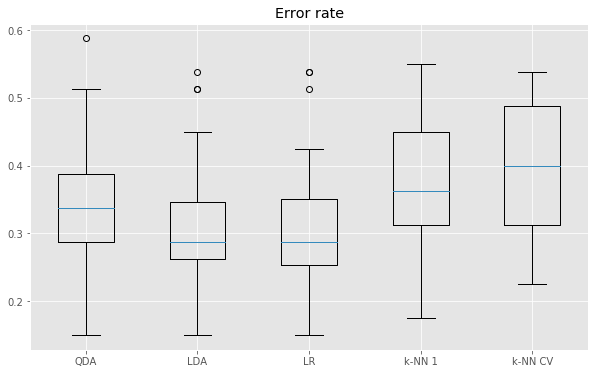

In [4]:
fig,plot = plt.subplots(figsize=(10, 6))
plot.boxplot(err)
meth=['QDA','LDA','LR','k-NN 1', 'k-NN CV']
plot.set_xticklabels(meth)
plot.set_title('Error rate')
plt.show()

idk u tell me

### Scenario 2: 

Details are as in Scenario 1, except that within class, the two predictors had a correlation of −0.5


In [5]:
#your code is here
err=np.zeros((50,5))
for i in range(50):
    #Generate Data:
    data=np.zeros((100,3))
    #X1
    data[:50,2]=0
    mean1=[0,0]
    cov1=[[1, -0.5], [-0.5, 1]]
    data[:50,0],data[:50,1]=np.random.multivariate_normal(mean1, cov1, 50).T
    #X2
    mean2=[1,1]
    cov2=[[1, -0.5], [-0.5, 1]]
    data[50:,2]=1
    data[50:,0],data[50:,1]=np.random.multivariate_normal(mean2, cov2, 50).T
    #X, y
    X=data[:,0:2]
    y=data[:,2]
    X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=1, test_size=0.8)
    #QDA
    model=QuadraticDiscriminantAnalysis()
    model.fit(X_train, y_train)
    err[i,0]=1-accuracy(model,X_test,y_test)
    #LDA
    model=LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)
    err[i,1]=1-accuracy(model,X_test,y_test)
    #Logistics
    model=LogisticRegression()
    model.fit(X_train, y_train)
    err[i,2]=1-accuracy(model,X_test,y_test)
    #k-NN k=1
    model=KNeighborsClassifier(n_neighbors = 1)
    model.fit(X_train, y_train)
    err[i,3]=1-accuracy(model,X_test,y_test)
    #k-NN with CV
    folds=10
    num=len(X_train)
    err_k=np.zeros((8))
    kf_10 = KFold(n_splits=folds)
    for train_index, test_index in kf_10.split(X_train):
        X_train_k, X_test_k = X_train[train_index], X_train[test_index]
        y_train_k, y_test_k = y_train[train_index], y_train[test_index]
        for k in range(2,10):
            model=KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train_k, y_train_k)
            err_k[k-2]+=1-accuracy(model,X_test_k, y_test_k)
    err_k[:]=err_k[:]/folds
    k=np.where(err_k==err_k.min())[0]+2
    model=KNeighborsClassifier(n_neighbors = k[0])
    model.fit(X_train, y_train)
    err[i,4]=1-accuracy(model,X_test,y_test)

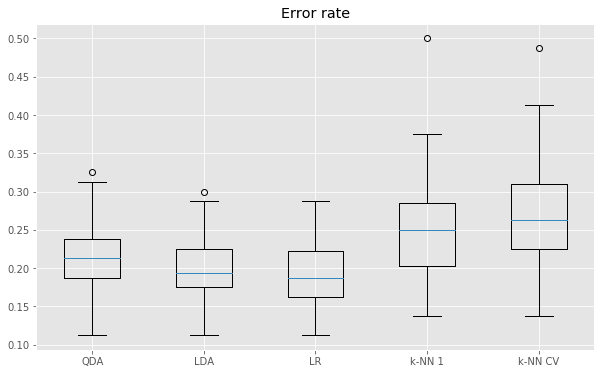

In [6]:
fig,plot = plt.subplots(figsize=(10, 6))
plot.boxplot(err)
meth=['QDA','LDA','LR','k-NN 1', 'k-NN CV']
plot.set_xticklabels(meth)
plot.set_title('Error rate')
plt.show()

### Scenario 3: 

Inthis scenario, the observations within each class were uncorrelated $t$-*distribution*  normal variables with a different mean in each class, 0 and 1 respectively.

We generate $X_1$ and $X_2$ from the multivariate $t$-*distribution* as follow:
* Generate $Y=(Y_1,Y_2)$ such that $Y$~$N(\boldsymbol{0},\Sigma)$
+ Generate $\boldsymbol{u}$~$\chi^2_{dof}$(Chi-Squared distribution) where $dof$ is degree of freedom of $t$-*distribution*
+ Then $X=Y/\sqrt{\boldsymbol{u}/dof}+\boldsymbol{\mu}$ is said to be follow multivariate $t$-*distribution* with parameter $\Sigma,\boldsymbol{mu},dof$


In [7]:
#your code is here
for i in range(50):
    #Generate Data:
    data_3=np.zeros((100,5))
    #Y
    meany_3=[0,0]
    covy_3=[[1,0],[0,1]]
    data_3[:50,2],data_3[50:,2]=np.random.multivariate_normal(meany_3, covy_3, 50).T
    data_3[:50,3]=data_3[:50,2]**2 + data_3[50:,2]**2 #u
    

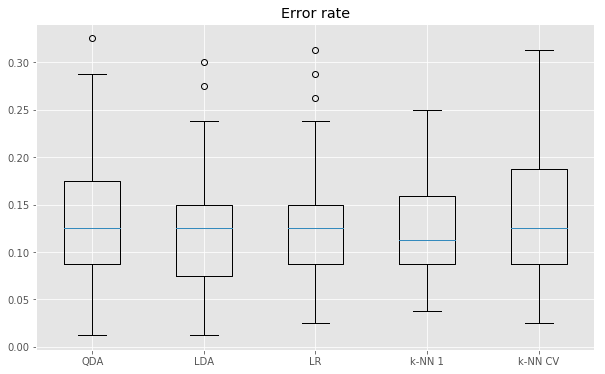

In [8]:
#your code is here
err=np.zeros((50,5))
for i in range(50):
    #Generate Data:
    data=np.zeros((100,10))
    #X1
    data[:50,2]=0
    mean1=[0,0]
    cov1=[[1, 0], [0, 1]]
    data[:50,0],data[:50,1]=np.random.multivariate_normal(mean1, cov1, 50).T
    #X2
    mean2=[1,1]
    cov2=[[1, 0], [0, 1]]
    data[50:,2]=1
    data[50:,0],data[50:,1]=np.random.multivariate_normal(mean2, cov2, 50).T
    #X, y
    X=data[:,0:2]
    #Logistic response
    data[:,3]=data[:,0]
    data[:,4]=data[:,1]**2
    data[:,5]=np.exp(data[:,0])
    data[:,6]=data[:,0]*data[:,1]
    data[:,7]=1/data[:,6]
    data[:,8]=np.exp(data[:,6]+2)
    Xres=data[:,3:9]
    yres=data[:,2]
    clf=LogisticRegression()
    clf.fit(Xres,yres)
    y=clf.predict(Xres)
    #Split data
    X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=1, test_size=0.8)
    #QDA
    model=QuadraticDiscriminantAnalysis()
    model.fit(X_train, y_train)
    err[i,0]=1-accuracy(model,X_test,y_test)
    #LDA
    model=LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)
    err[i,1]=1-accuracy(model,X_test,y_test)
    #Logistics
    model=LogisticRegression()
    model.fit(X_train, y_train)
    err[i,2]=1-accuracy(model,X_test,y_test)
    #k-NN k=1
    model=KNeighborsClassifier(n_neighbors = 1)
    model.fit(X_train, y_train)
    err[i,3]=1-accuracy(model,X_test,y_test)
    #k-NN with CV
    folds=10
    num=len(X_train)
    err_k=np.zeros((8))
    kf_10 = KFold(n_splits=folds)
    for train_index, test_index in kf_10.split(X_train):
        X_train_k, X_test_k = X_train[train_index], X_train[test_index]
        y_train_k, y_test_k = y_train[train_index], y_train[test_index]
        for k in range(2,10):
            model=KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train_k, y_train_k)
            err_k[k-2]+=1-accuracy(model,X_test_k, y_test_k)
    err_k[:]=err_k[:]/folds
    k=np.where(err_k==err_k.min())[0]+2
    model=KNeighborsClassifier(n_neighbors = k[0])
    model.fit(X_train, y_train)
    err[i,4]=1-accuracy(model,X_test,y_test)
fig,plot = plt.subplots(figsize=(10, 6))
plot.boxplot(err)
meth=['QDA','LDA','LR','k-NN 1', 'k-NN CV']
plot.set_xticklabels(meth)
plot.set_title('Error rate')
plt.show()

### Scenario 4: 

Normal distribution with a correlation of 0.5 between the predictors in the first class, and correlation of −0.5 between the predictors in the second class.


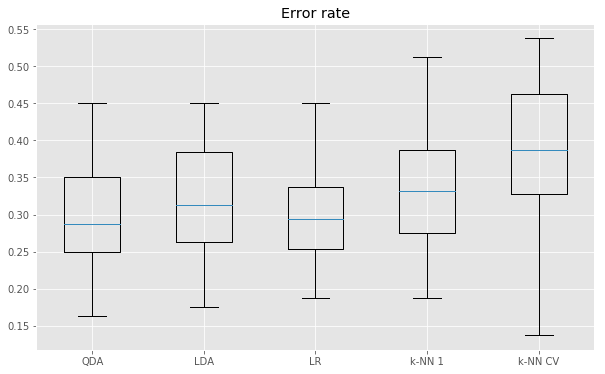

In [9]:
#your code is here
err=np.zeros((50,5))
for i in range(50):
    #Generate Data:
    data=np.zeros((100,3))
    #X1
    data[:50,2]=0
    mean1=[0,0]
    cov1=[[1, 0.5], [0.5, 1]]
    data[:50,0],data[:50,1]=np.random.multivariate_normal(mean1, cov1, 50).T
    #X2
    mean2=[1,1]
    cov2=[[1, -0.5], [-0.5, 1]]
    data[50:,2]=1
    data[50:,0],data[50:,1]=np.random.multivariate_normal(mean2, cov2, 50).T
    #X, y
    X=data[:,0:2]
    y=data[:,2]
    X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=1, test_size=0.8)
    #QDA
    model=QuadraticDiscriminantAnalysis()
    model.fit(X_train, y_train)
    err[i,0]=1-accuracy(model,X_test,y_test)
    #LDA
    model=LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)
    err[i,1]=1-accuracy(model,X_test,y_test)
    #Logistics
    model=LogisticRegression()
    model.fit(X_train, y_train)
    err[i,2]=1-accuracy(model,X_test,y_test)
    #k-NN k=1
    model=KNeighborsClassifier(n_neighbors = 1)
    model.fit(X_train, y_train)
    err[i,3]=1-accuracy(model,X_test,y_test)
    #k-NN with CV
    folds=10
    num=len(X_train)
    err_k=np.zeros((8))
    kf_10 = KFold(n_splits=folds)
    for train_index, test_index in kf_10.split(X_train):
        X_train_k, X_test_k = X_train[train_index], X_train[test_index]
        y_train_k, y_test_k = y_train[train_index], y_train[test_index]
        for k in range(2,10):
            model=KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train_k, y_train_k)
            err_k[k-2]+=1-accuracy(model,X_test_k, y_test_k)
    err_k[:]=err_k[:]/folds
    k=np.where(err_k==err_k.min())[0]+2
    model=KNeighborsClassifier(n_neighbors = k[0])
    model.fit(X_train, y_train)
    err[i,4]=1-accuracy(model,X_test,y_test)
fig,plot = plt.subplots(figsize=(10, 6))
plot.boxplot(err)
meth=['QDA','LDA','LR','k-NN 1', 'k-NN CV']
plot.set_xticklabels(meth)
plot.set_title('Error rate')
plt.show()

### Scenario 5: 

Details are as in Scenario 1. However we resample the respond as logistic regresion of $X_1^2+X_2^2+X_1*X_2$


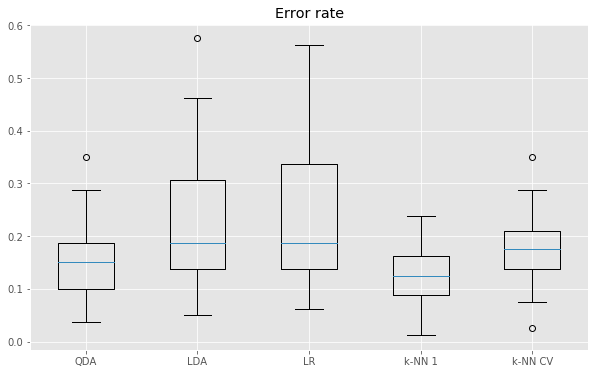

In [10]:
#your code is here
err=np.zeros((50,5))
for i in range(50):
    #Generate Data:
    data=np.zeros((100,10))
    #X1
    data[:50,2]=0
    mean1=[0,0]
    cov1=[[1, 0], [0, 1]]
    data[:50,0],data[:50,1]=np.random.multivariate_normal(mean1, cov1, 50).T
    #X2
    mean2=[1,1]
    cov2=[[1, 0], [0, 1]]
    data[50:,2]=1
    data[50:,0],data[50:,1]=np.random.multivariate_normal(mean2, cov2, 50).T
    #X, y
    X=data[:,0:2]
    #Logistic response
    data[:,3]=data[:,0]**2
    data[:,4]=data[:,1]**2
    data[:,5]=data[:,0]*data[:,1]
    Xres=data[:,3:6]
    yres=data[:,2]
    clf=LogisticRegression()
    clf.fit(Xres,yres)
    y=clf.predict(Xres)
    #Split data
    X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=1, test_size=0.8)
    #QDA
    model=QuadraticDiscriminantAnalysis()
    model.fit(X_train, y_train)
    err[i,0]=1-accuracy(model,X_test,y_test)
    #LDA
    model=LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)
    err[i,1]=1-accuracy(model,X_test,y_test)
    #Logistics
    model=LogisticRegression()
    model.fit(X_train, y_train)
    err[i,2]=1-accuracy(model,X_test,y_test)
    #k-NN k=1
    model=KNeighborsClassifier(n_neighbors = 1)
    model.fit(X_train, y_train)
    err[i,3]=1-accuracy(model,X_test,y_test)
    #k-NN with CV
    folds=10
    num=len(X_train)
    err_k=np.zeros((8))
    kf_10 = KFold(n_splits=folds)
    for train_index, test_index in kf_10.split(X_train):
        X_train_k, X_test_k = X_train[train_index], X_train[test_index]
        y_train_k, y_test_k = y_train[train_index], y_train[test_index]
        for k in range(2,10):
            model=KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train_k, y_train_k)
            err_k[k-2]+=1-accuracy(model,X_test_k, y_test_k)
    err_k[:]=err_k[:]/folds
    k=np.where(err_k==err_k.min())[0]+2
    model=KNeighborsClassifier(n_neighbors = k[0])
    model.fit(X_train, y_train)
    err[i,4]=1-accuracy(model,X_test,y_test)
fig,plot = plt.subplots(figsize=(10, 6))
plot.boxplot(err)
meth=['QDA','LDA','LR','k-NN 1', 'k-NN CV']
plot.set_xticklabels(meth)
plot.set_title('Error rate')
plt.show()

### Scenario 6: 

Details are as in Scenario 1. However we resample the respond as logistic regresion of $X_1+X_2^2+exp(X_1)+X_1*X_2+1/(X_1*X_2)+exp(X_1*X_2+2)$


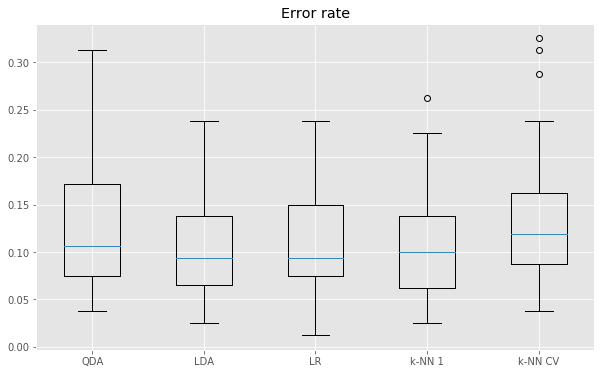

In [11]:
#your code is here
err=np.zeros((50,5))
for i in range(50):
    #Generate Data:
    data=np.zeros((100,10))
    #X1
    data[:50,2]=0
    mean1=[0,0]
    cov1=[[1, 0], [0, 1]]
    data[:50,0],data[:50,1]=np.random.multivariate_normal(mean1, cov1, 50).T
    #X2
    mean2=[1,1]
    cov2=[[1, 0], [0, 1]]
    data[50:,2]=1
    data[50:,0],data[50:,1]=np.random.multivariate_normal(mean2, cov2, 50).T
    #X, y
    X=data[:,0:2]
    #Logistic response
    data[:,3]=data[:,0]
    data[:,4]=data[:,1]**2
    data[:,5]=np.exp(data[:,0])
    data[:,6]=data[:,0]*data[:,1]
    data[:,7]=1/data[:,6]
    data[:,8]=np.exp(data[:,6]+2)
    Xres=data[:,3:9]
    yres=data[:,2]
    clf=LogisticRegression()
    clf.fit(Xres,yres)
    y=clf.predict(Xres)
    #Split data
    X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=1, test_size=0.8)
    #QDA
    model=QuadraticDiscriminantAnalysis()
    model.fit(X_train, y_train)
    err[i,0]=1-accuracy(model,X_test,y_test)
    #LDA
    model=LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)
    err[i,1]=1-accuracy(model,X_test,y_test)
    #Logistics
    model=LogisticRegression()
    model.fit(X_train, y_train)
    err[i,2]=1-accuracy(model,X_test,y_test)
    #k-NN k=1
    model=KNeighborsClassifier(n_neighbors = 1)
    model.fit(X_train, y_train)
    err[i,3]=1-accuracy(model,X_test,y_test)
    #k-NN with CV
    folds=10
    num=len(X_train)
    err_k=np.zeros((8))
    kf_10 = KFold(n_splits=folds)
    for train_index, test_index in kf_10.split(X_train):
        X_train_k, X_test_k = X_train[train_index], X_train[test_index]
        y_train_k, y_test_k = y_train[train_index], y_train[test_index]
        for k in range(2,10):
            model=KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train_k, y_train_k)
            err_k[k-2]+=1-accuracy(model,X_test_k, y_test_k)
    err_k[:]=err_k[:]/folds
    k=np.where(err_k==err_k.min())[0]+2
    model=KNeighborsClassifier(n_neighbors = k[0])
    model.fit(X_train, y_train)
    err[i,4]=1-accuracy(model,X_test,y_test)
fig,plot = plt.subplots(figsize=(10, 6))
plot.boxplot(err)
meth=['QDA','LDA','LR','k-NN 1', 'k-NN CV']
plot.set_xticklabels(meth)
plot.set_title('Error rate')
plt.show()

**Interpret the result. Think about what type of the decision boundary in each case, you can draw the figure of data to visualize.**

## Part 2: The Stock Market Data

The Stock market data set consists of percentage returns for the S&P 500 stock index over 1, 250 days, from the beginning of 2001 until the end of 2005. For each date, we have recorded:

+ Lag1 through Lag5: the percentage returns for each of the five previous trading days
* Volume: the number of shares traded on the previous day, in billions
* Today: the percentage return on the date in question
* Direction: whether the market was Up or Down on this date

What to do:

+ Load data: Smarket.csv
* Explore the Data, choose which predictors affect the respond **Direction** most.
* Do classification using Logistics, kNN with k=1, kNN with *cross-validation*, LDA, QDA and interpret the result. For kNN, plot the figure of of k versus test error.

In [12]:
#your code is here
smarket=pd.read_csv('Smarket.csv')
smarket['dir']=smarket['Direction'].map({'Up':1,'Down':0})

In [13]:
smarket.corr()

Unnamed: 0      Year      Lag1      Lag2      Lag3      Lag4  \
Unnamed: 0    1.000000  0.979773  0.035415  0.036022  0.038989  0.041437   
Year          0.979773  1.000000  0.029700  0.030596  0.033195  0.035689   
Lag1          0.035415  0.029700  1.000000 -0.026294 -0.010803 -0.002986   
Lag2          0.036022  0.030596 -0.026294  1.000000 -0.025897 -0.010854   
Lag3          0.038989  0.033195 -0.010803 -0.025897  1.000000 -0.024051   
Lag4          0.041437  0.035689 -0.002986 -0.010854 -0.024051  1.000000   
Lag5          0.035025  0.029788 -0.005675 -0.003558 -0.018808 -0.027084   
Volume        0.546348  0.539006  0.040910 -0.043383 -0.041824 -0.048414   
Today         0.035273  0.030095 -0.026155 -0.010250 -0.002448 -0.006900   
dir           0.081433  0.074608 -0.039757 -0.024081  0.006132  0.004215   

                Lag5    Volume     Today       dir  
Unnamed: 0  0.035025  0.546348  0.035273  0.081433  
Year        0.029788  0.539006  0.030095  0.074608  
Lag1       -0.005675  0.040910 -0.026155 -0.039757  
Lag2       -0.003558 -0.043383 -0.010250 -0.024081  
Lag3       -0.018808 -0.041824 -0.002448  0.006132  
Lag4       -0.027084 -0.048414 -0.006900  0.004215  
Lag5        1.000000 -0.022002 -0.034860  0.005423  
Volume     -0.022002  1.000000  0.014592  0.022951  
Today      -0.034860  0.014592  1.000000  0.730563  
dir         0.005423  0.022951  0.730563  1.000000

In [21]:
rsp=np.array(smarket['dir']).T
prd=np.array(smarket[['Lag1','Lag2']])

In [22]:
er=np.zeros(4)
er_k=np.zeros((19,2))
prd_train,prd_test,rsp_train,rsp_test=train_test_split(prd, rsp, random_state=1, test_size=0.8)
#Logistic
lr=LogisticRegression()
lr.fit(prd_train,rsp_train)
er[0]=1-accuracy(lr,prd_test,rsp_test)
#QDA
qda=QuadraticDiscriminantAnalysis()
qda.fit(prd_train,rsp_train)
er[1]=1-accuracy(qda,prd_test,rsp_test)
#LDA
lda=LinearDiscriminantAnalysis()
lda.fit(prd_train,rsp_train)
er[2]=1-accuracy(lda,prd_test,rsp_test)
#k-NN k=1
knn1=KNeighborsClassifier(n_neighbors = 1)
knn1.fit(prd_train, rsp_train)
er[3]=1-accuracy(knn1,prd_test,rsp_test)
#k-NN k!=1
for z in range(2,21):
    knn=KNeighborsClassifier(n_neighbors=z)
    knn.fit(prd_train, rsp_train)
    er_k[z-2,0]=1-accuracy(knn,prd_test,rsp_test)
    er_k[z-2,1]=z

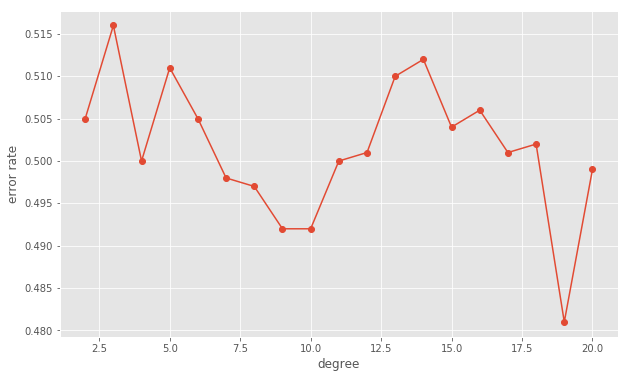

In [23]:
plt.figure(figsize=(10,6))
plt.plot(er_k[:,1],er_k[:,0],'-o')
plt.xlabel('degree')
plt.ylabel('error rate')
plt.show()

In [24]:
er

array([0.472, 0.469, 0.476, 0.491])